In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

In [2]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=",")

oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [3]:
gdp_per_capita = pd.read_csv(
    "gdp_per_capita.csv",
    thousands=",",
    delimiter="\t",
    encoding="latin1",
    na_values="n/a",
)

gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(
        left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True
    )
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[
        keep_indices
    ]

In [5]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

X, y

(array([[ 9054.914],
        [ 9437.372],
        [12239.894],
        [12495.334],
        [15991.736],
        [17288.083],
        [18064.288],
        [19121.592],
        [20732.482],
        [25864.721],
        [27195.197],
        [29866.581],
        [32485.545],
        [35343.336],
        [37044.891],
        [37675.006],
        [40106.632],
        [40996.511],
        [41973.988],
        [43331.961],
        [43603.115],
        [43724.031],
        [43770.688],
        [49866.266],
        [50854.583],
        [50961.865],
        [51350.744],
        [52114.165],
        [55805.204]]),
 array([[6. ],
        [5.6],
        [4.9],
        [5.8],
        [6.1],
        [5.6],
        [4.8],
        [5.1],
        [5.7],
        [6.5],
        [5.8],
        [6. ],
        [5.9],
        [7.4],
        [7.3],
        [6.5],
        [6.9],
        [7. ],
        [7.4],
        [7.3],
        [7.3],
        [6.9],
        [6.8],
        [7.2],
        [7.5],
        [7.3],

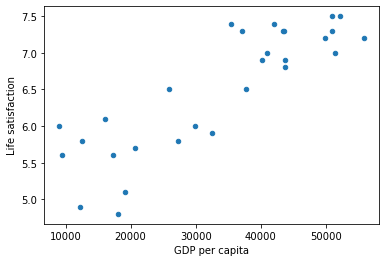

In [6]:
# Visualize the data
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.show()

In [11]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()
# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
# Cyprus' GDP per capita
X_new = [[22587]]
# outputs [[ 5.96242338]]
print(model.predict(X_new))

[[5.96242338]]


> Replacing the Linear Regression model with k-Nearest Neighbors
regression

In [10]:
# Select k-Nearest Neighbors regression
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
# Cyprus' GDP per capita
X_new = [[22587]]
# outputs [[ 5.76666667]]
print(model.predict(X_new))

[[5.76666667]]
